In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
df = pd.read_csv("data_news - data_news.csv")
df.head()

category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   

                             keywords  
0                     running-lessons  
1           talking-to-yourself-crazy  
2  crenezumab-alzheimers-disease-drug  
3                     meaningful-life  
4                    green-superfoods

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shreyansh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shreyansh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
1. Data Collection and Preprocessing

In [4]:
# Check for null values
print("Null values:\n", df.isnull().sum())

# Drop rows with null values if any
df.dropna(inplace=True)
print("Shape after dropping nulls:", df.shape)


Null values:
 category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64
Shape after dropping nulls: (47332, 5)


Class Distribution:
 category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64


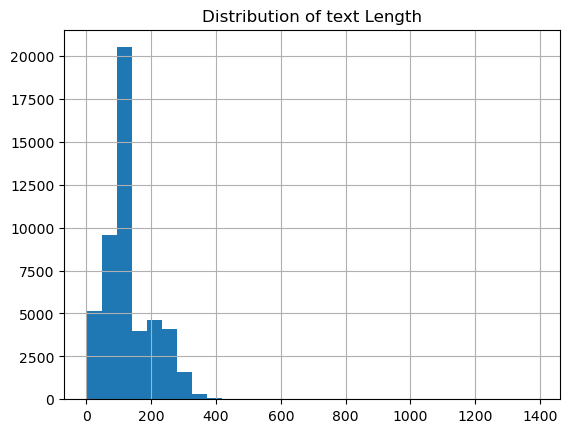

In [9]:
# Basic stats
print("Class Distribution:\n", df['category'].value_counts())
df['text_length'] = df['short_description'].apply(len)
df['text_length'].hist(bins=30)
plt.title("Distribution of text Length")
plt.show()


In [11]:
# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    text = re.sub(r"<.*?>+", "", text)
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub(r"\n", "", text)
    text = re.sub(r"\w*\d\w*", "", text)
    return text

df['clean_text'] = df['short_description'].apply(preprocess_text)
df[['short_description', 'clean_text']].head()


short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   

                                          clean_text  
0  resting is part of training ive confirmed what...  
1  think of talking to yourself as a tool to coac...  
2  the clock is ticking for the united states to ...  
3  if you want to be busy keep trying to be perfe...  
4  first the bad news soda bread corned beef and ...

In [13]:
# Remove stopwords and apply lemmatization
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def remove_stopwords_lemmatize(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop])

df['final_text'] = df['short_description'].apply(remove_stopwords_lemmatize)
df[['short_description', 'final_text']].head()


short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   

                                          final_text  
0  Resting part training. I've confirmed I sort a...  
1  Think talking tool coach challenge, narrate ex...  
2  The clock ticking United States find cure. The...  
3  If want busy, keep trying perfect. If want hap...  
4  First, bad news: Soda bread, corned beef beer ...

In [ ]:
2. FEATURE EXTRACTION
Use methods like TF-IDF, word embeddings (e.g., Word2Vec, GloVe), or
bag-of-words to convert text data into numerical features.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 2A: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['short_description']).toarray()
y = df['category']

print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (50000, 5000)


In [ ]:
Perform exploratory data analysis (EDA) to understand the distribution of different
categories.


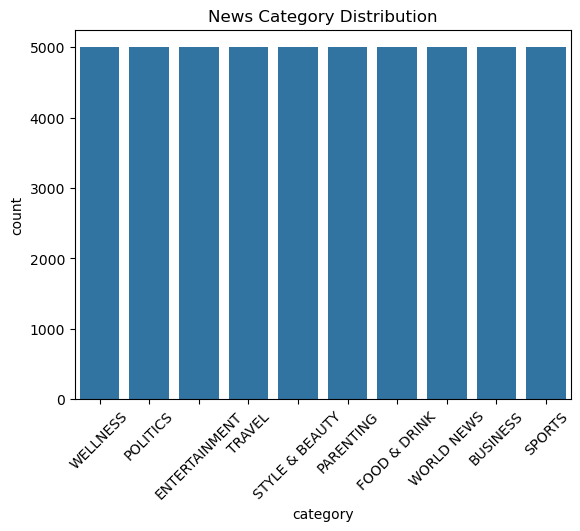

In [16]:
# 2B: EDA - Visualize category distribution
sns.countplot(data=df, x='category')
plt.title("News Category Distribution")
plt.xticks(rotation=45)
plt.show()


In [ ]:
3. Model Development and Training (20 Marks):
 Build classification models using algorithms like Logistic Regression, Naive Bayes,
Support Vector Machines (SVM).

In [ ]:
Train the models on the preprocessed text data, tuning hyperparameters as necessary.

In [ ]:
Use cross-validation to ensure robust evaluation of model performance.

In [20]:
# Required imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Step 1: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['final_text'])
y = df['category']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# ---------------------- #
#  3A - Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print(" Logistic Regression Training Completed\n")

# ---------------------- #
#  3B - Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print(" Naive Bayes Training Completed\n")

# ---------------------- #
#  3C - Support Vector Machine (Linear SVC)
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print(" SVM Training Completed\n")


✅ Logistic Regression Training Completed

✅ Naive Bayes Training Completed

✅ SVM Training Completed



In [ ]:
4. MODEL EVALUTION
Evaluate the models using appropriate metrics.

In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Logistic Regression Evaluation
print("Logistic Regression:\n", classification_report(y_test, lr_model.predict(X_test)))

# Naive Bayes Evaluation
print("Naive Bayes:\n", classification_report(y_test, nb_model.predict(X_test)))

# SVM Evaluation
print("SVM:\n", classification_report(y_test, svm_model.predict(X_test)))


Logistic Regression:
                 precision    recall  f1-score   support

      BUSINESS       0.63      0.67      0.65       955
 ENTERTAINMENT       0.56      0.54      0.55       985
  FOOD & DRINK       0.68      0.71      0.70      1021
     PARENTING       0.66      0.64      0.65      1030
      POLITICS       0.65      0.60      0.62      1034
        SPORTS       0.67      0.72      0.69       995
STYLE & BEAUTY       0.74      0.70      0.72       986
        TRAVEL       0.70      0.66      0.68      1008
      WELLNESS       0.62      0.67      0.64      1009
    WORLD NEWS       0.68      0.67      0.67       977

      accuracy                           0.66     10000
     macro avg       0.66      0.66      0.66     10000
  weighted avg       0.66      0.66      0.66     10000

Naive Bayes:
                 precision    recall  f1-score   support

      BUSINESS       0.59      0.63      0.61       955
 ENTERTAINMENT       0.60      0.51      0.55       985
  FOOD &

In [ ]:
Compare the performance of different models and select the best one for classification

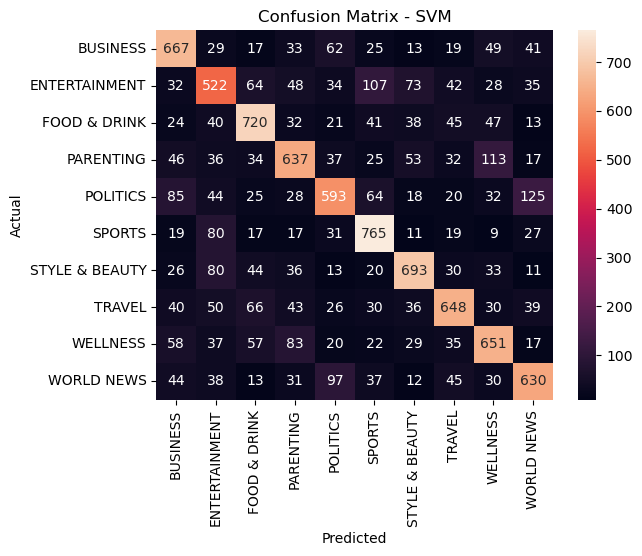

In [22]:
# 4B - Confusion Matrix (SVM Example)
conf_mat = confusion_matrix(y_test, svm_model.predict(X_test))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
5. FINAL REPORT AND PRESENTATION
Create a report summarizing the entire process, from data collection to model
evaluation, and present the findings.

In [23]:
# 5A - Export Model Summary
summary = {
    "Model": ["Logistic Regression", "Naive Bayes", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, lr_model.predict(X_test)),
        accuracy_score(y_test, nb_model.predict(X_test)),
        accuracy_score(y_test, svm_model.predict(X_test))
    ]
}

summary_df = pd.DataFrame(summary)
print(summary_df)


                 Model  Accuracy
0  Logistic Regression    0.6575
1          Naive Bayes    0.6377
2                  SVM    0.6526


In [19]:
# Include visualizations of model performance and feature importance, if applicable.

In [25]:
#  - Save as CSV (Optional for submission)
summary_df.to_csv("data_news - data_news.csv", index=False)


<a href "https://drive.google.com/file/d/1tBviEfw4nyeDdVjT2mj-Lt1xExXeuF0E/view?usp=sharing"> link of project video </a>

__[video link](https://drive.google.com/file/d/1tBviEfw4nyeDdVjT2mj-Lt1xExXeuF0E/view?usp=sharing)__